In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, Image
from google.colab import files
from matplotlib.ticker import PercentFormatter, FuncFormatter, MultipleLocator

1.   Green = Ground
2.   Blue = Channel
3.   Red = floating- nothing connected
4.  Outputs: T21, 17, 13, 11, 9, 7


Channels on T2, 4, 6, 7


# Trace order originally.

1.   Channel 2 = Trace 7
2.   Ch3 = T9
3.   Ch4 = T11
4.   Ch5 = T13
5.   Ch6 = T17
6.   Ch7 = T21

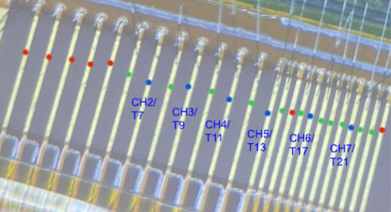

In [ ]:
image_path = '/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Images/flex3cmtraces.PNG'

display(Image(filename=image_path))

# Trace order in reverse (current order after Forrest fixed)

1.   Channel 7 = Trace 7
2.   Ch6 = T9
3.   Ch5 = T11
4.   Ch4 = T13
5.   Ch3 = T17
6.   Ch2 = T21


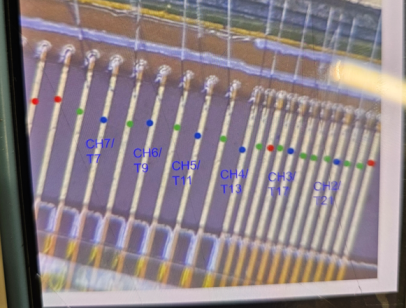

In [ ]:
image_path = '/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Images/flex3cmreversetraces.PNG'

display(Image(filename=image_path))

In [ ]:
def wave_list(trace_min,trace_max,ch_num,rt_num,l):
  list_wave = []
  trace_max += 1

  for rise_time in range(0,rt_num):
    list_wave.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_wave[rise_time].append([])

  list_t = []
  for rise_time in range(0,rt_num):
    list_t.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_t[rise_time].append([])

  list_a = []
  for rise_time in range(0,rt_num):
    list_a.append([])
    for inj_num in range(0,trace_max-trace_min):
      list_a[rise_time].append([])

  for rise_time in range(0,rt_num):
    for inj_num in range(trace_min,trace_max):
      for ch_num in range(1,ch_num+1):
        list_ = f"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Lab Data Transfer/7-11-17/inj{inj_num}/C{ch_num}--inj{inj_num}-7-11-17-21-l{l[rise_time]}--00000.csv"
        if l[rise_time] == l[0]:
          list_t[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.25','.25'), names='time, amplitude', delimiter=",", skip_header=5)["time"])
          list_a[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.25','.25'), names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])
        elif l[rise_time] == l[1]:
          list_t[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.5','.5'), names='time, amplitude', delimiter=",", skip_header=5)["time"])
          list_a[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.5','.5'), names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])
        else:
          list_t[rise_time][inj_num-6].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["time"])
          list_a[rise_time][inj_num-6].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])

  return list_t,list_a

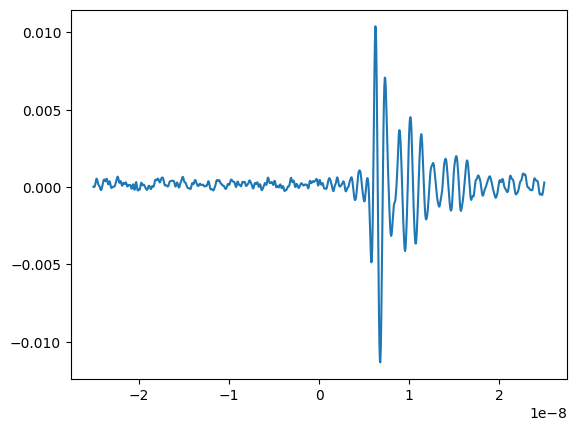

In [ ]:
l = [0.25,0.5,1]
wave_t, wave_a = wave_list(6,22,4,3,l)

plt.plot(wave_t[0][0][0],wave_a[0][0][0])

In [ ]:
list_wave = []
for rise_time in range(0,3):
  list_wave.append([])
  for inj_num in range(0,23-6):
    list_wave[rise_time].append([])

list_t = []
for rise_time in range(0,3):
  list_t.append([])
  for inj_num in range(0,23-6):
    list_t[rise_time].append([])

list_a = []
for rise_time in range(0,3):
  list_a.append([])
  for inj_num in range(0,23-6):
    list_a[rise_time].append([])

l=[.25,.5,1]

for rise_time in range(0,3):
  for inj_num in range(6,23):
    for ch_num in range(1,5):
      list_ = f"/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/Lab Data Transfer/7-11-17/inj{inj_num}/C{ch_num}--inj{inj_num}-7-11-17-21-l{l[rise_time]}--00000.csv"
      if l[rise_time] == 0.25:
        list_t[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.25','.25'), names='time, amplitude', delimiter=",", skip_header=5)["time"])
        list_a[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.25','.25'), names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])
      elif l[rise_time] == 0.5:
        list_t[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.5','.5'), names='time, amplitude', delimiter=",", skip_header=5)["time"])
        list_a[rise_time][inj_num-6].append(np.genfromtxt(list_.replace('0.5','.5'), names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])
      else:
        list_t[rise_time][inj_num-6].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["time"])
        list_a[rise_time][inj_num-6].append(np.genfromtxt(list_, names='time, amplitude', delimiter=",", skip_header=5)["amplitude"])

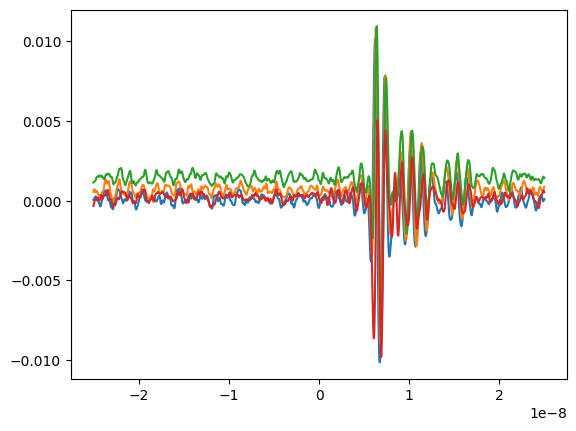

In [ ]:
#list_wave[rise_time=0->.25][injection-6][channel-1]
#                    1->.5
#                    2->1
#22-6=16

"""
list_wave[0][16][1]["amplitude"]
list_wave[0][16][1]["time"]
"""
for i in range(0,4):
  plt.plot(list_t[0][16][i],list_a[0][16][i])

In [ ]:
# not always have channel 4-signal
# first plot
# channel 2 & 3 very small cross talk

# 0. change channel to channel on board

# 1. % of channel 2 and 3 max
# max value of channel 1
#  (|max1|-|max2|)/|max1|
#  (|max1|-|max3|)/|max1|

# 2. average of amplitude

# 3. plot signal - channel 4- injection
# plot it by itself very close to 0
# measure rise time -> reach the peak
# -rise time determines how isolated the signal is
# -faster rise time = less noise
# -zoom in , 5*10^-9 sec

# 4. send to simone via email - small cross talk, ringing, rise time
# -1 image

# 5. redo test
# -A. hover the probe over the traces very slightly
# - read out signal

# -B. remove probe entirely
# - read out signal

# both average + %

# compare noise with channel 2 and 3 plot 1

# next combination to test at the lab

# noise + data together

# 3 cm done
# 5 cm done
# current - 7, 11, 17

# afterward if simone tells me to get the rest of it:
# plot of peak signal over time in terms of crosstalk
# cross talk depends on individual trace: float , ground, channel

# inject 1 on each trace in any 3 channels
# - 7 11 17
# - 24 indivduals, including 7,11,17 again
# -peak for each/average
# -noise together - hover 1-2cm above

# slides
# what other trace combinations did u do

In [ ]:
#Plotting signals

#3 traces
def plt_signal_T3(ch1_amp,ch2_amp,ch3_amp,ch4_amp,ch1_t,ch2_t,ch3_t,ch4_t,inj,T1,T2,T3,T4, ch1, ch2, ch3, ch4, x1,x2,rise_time,saveplot=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors"):
  if saveplot == True:
    plt.figure()
    plt.ylabel("Amplitude", fontweight="heavy")
    plt.xlabel("Time (sec)", fontweight="heavy")
    plt.xlim(x1,x2)
    l = [0.25,0.5,1]
    plt.title(f"Rise Time: {l[rise_time]} ns, Inject: Trace {inj} for T={T1},{T2},{T3},{T4}", fontweight="heavy")
    plt.plot(ch1_t,ch1_amp, label=f"Trace {T1}/Channel {ch1}", color = "blue");
    plt.plot(ch2_t,ch2_amp, label=f"Trace {T2}/Channel {ch2}", color = "green");
    plt.plot(ch3_t,ch3_amp, label=f"Trace {T3}/Channel {ch3}", color = "orange");
    plt.plot(ch4_t,ch4_amp, label=f"Trace {T4}/Channel {ch4}", color = "red");

    plt.savefig(f'{directory}/plots-inj{inj}-rt{l[rise_time]}.png')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.show()
  else:
    plt.figure()
    plt.ylabel("Amplitude", fontweight="heavy")
    plt.xlabel("Time (sec)", fontweight="heavy")
    plt.xlim(x1,x2)
    l = [0.25,0.5,1]
    plt.title(f"Rise Time: {l[rise_time]} ns, Inject: Trace {inj} for T={T1},{T2},{T3},{T4}", fontweight="heavy")
    plt.plot(ch1_t,ch1_amp, label=f"Trace {T1}/Channel {ch1}", color = "blue");
    plt.plot(ch2_t,ch2_amp, label=f"Trace {T2}/Channel {ch2}", color = "green");
    plt.plot(ch3_t,ch3_amp, label=f"Trace {T3}/Channel {ch3}", color = "orange");
    plt.plot(ch4_t,ch4_amp, label=f"Trace {T4}/Channel {ch4}", color = "red");

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
    plt.show()

  #  (|max1|-|max2|)/|max1| = %
  #  (|max1|-|max3|)/|max1| = %
  if ((inj==7) or (inj==11) or (inj==17)) or (inj==21):
    if (inj == T1):
      inj_amp = ch1_amp
      abs_inj_amp = np.abs(ch1_amp)
      abs_ch2_amp = np.abs(ch2_amp)
      abs_ch3_amp = np.abs(ch3_amp)
      abs_ch4_amp = np.abs(ch4_amp)

      max_inj = np.max(abs_inj_amp)
      max2 = np.max(abs_ch2_amp)
      max3 = np.max(abs_ch3_amp)
      max4 = np.max(abs_ch4_amp)
    elif (inj == T2):
      inj_amp = ch2_amp
      abs_ch2_amp = np.abs(ch1_amp)
      abs_inj_amp = np.abs(inj_amp)
      abs_ch3_amp = np.abs(ch3_amp)
      abs_ch4_amp = np.abs(ch4_amp)

      max2 = np.max(abs_ch2_amp)
      max_inj = np.max(abs_inj_amp)
      max3 = np.max(abs_ch3_amp)
      max4 = np.max(abs_ch4_amp)
    elif (inj == T3):
      inj_amp = ch3_amp
      abs_ch2_amp = np.abs(ch1_amp)
      abs_ch3_amp = np.abs(ch2_amp)
      abs_inj_amp = np.abs(inj_amp)
      abs_ch4_amp = np.abs(ch4_amp)

      max2 = np.max(abs_ch2_amp)
      max3 = np.max(abs_ch3_amp)
      max_inj = np.max(abs_inj_amp)
      max4 = np.max(abs_ch4_amp)

    else:
      inj_amp = ch4_amp
      abs_ch2_amp = np.abs(ch1_amp)
      abs_ch3_amp = np.abs(ch2_amp)
      abs_ch4_amp = np.abs(ch3_amp)
      abs_inj_amp = np.abs(inj_amp)

      max2 = np.max(abs_ch2_amp)
      max3 = np.max(abs_ch3_amp)
      max4 = np.max(abs_ch4_amp)
      max_inj = np.max(abs_inj_amp)

    accuracy_inj_ch2 = (max_inj - max2)/max_inj
    accuracy_inj_ch3 = (max_inj - max3)/max_inj
    accuracy_inj_ch4 = (max_inj - max4)/max_inj

    # average of amplitude/
    avg_ch1 = np.mean(ch1_amp)
    avg_ch2 = np.mean(ch2_amp)
    avg_ch3 = np.mean(ch3_amp)
    avg_ch4 = np.mean(ch4_amp)

    print(f"Absolute Maximum Value: Injectected: {max_inj:.6f}, Other non-injected: {max2:.6f}, {max3:.6f}.")

    print(f"Accuracy with Trace {inj} and Trace {T2}: {accuracy_inj_ch2*100:.2f}%. {100-accuracy_inj_ch2*100:.2f}% crosstalk.")
    print(f"Accuracy with Trace {inj} and Trace {T3}: {accuracy_inj_ch3*100:.2f}%. {100-accuracy_inj_ch3*100:.2f}% crosstalk.")
    print(f"Accuracy with Trace {inj} and Trace {T4}: {accuracy_inj_ch4*100:.2f}%. {100-accuracy_inj_ch4*100:.2f}% crosstalk.")

    print(f"Average Amplitude for Trace {T1}(Channel {ch1}): {avg_ch1:.6f}.")
    print(f"Average Amplitude for Trace {T2}(Channel {ch2}): {avg_ch2:.6f}.")
    print(f"Average Amplitude for Trace {T3}(Channel {ch3}): {avg_ch3:.6f}.")
    print(f"Average Amplitude for Trace {T4}(Channel {ch4}): {avg_ch4:.6f}.")

In [ ]:
for l in range(0,3):
  for i in range(0,23-6):
      plt_signal_T3(list_a[l][i][0],list_a[l][i][1],list_a[l][i][2],list_a[l][i][3],list_t[l][i][0],list_t[l][i][1],list_t[l][i][2],list_t[l][i][3],i+6,7,11,17,21, 7, 5, 3, 2,-.5*10**-8 ,2*10**-8, l, saveplot=True, directory = "/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.11.17.21/RT.0.25.0.5.1 Plots")

In [ ]:
def noise_crosstalk(amp_noise,amp_list):
  absmax_amp=(max(abs(amp_list[0][1])))
  print(f"Abs max = {absmax_amp:.6f}\n")

  absmax_noise_list = []
  for i in range(0,3):
    absmax_noise_list.append(max(abs(amp_noise[i])))
    print(f"Abs noise max ch{i+1}= {absmax_noise_list[i]:.6f}")

    noise_crosstalk = (1-(absmax_amp-absmax_noise_list[i])/absmax_amp)*100

    print(f"Noise cross talk ch{i+1} = {noise_crosstalk:.6f}%\n")

In [ ]:
def position_plots(amp,trace_min,trace_max,l,ch_num,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/"):
  trace_x = list(range(trace_min,trace_max+1))

  position = []

  for rt in range(0,len(l)):
    position.append([])
    for ch in range(ch_num):
      position[rt].append([])

  for rt in range(0,len(l)):
    for ch in range(ch_num):
      for tr in range(0,trace_max-trace_min+1):
        position[rt][ch].append(max(abs(amp[rt][tr][ch])))

  for rt in range(len(l)):
    for ch in range(ch_num):
      #finding % cross talk
      max_a = max(position[rt][ch])
      max_amp = max_a/max_a

      crosstalk = []

      for amp in position[rt][ch]:
        crosstalk.append(1-(max_a-amp)/max_a)

      #plot
      plt.figure(figsize=(16,6))
      plt.title(f"Rise time={l[rt]}ns, Ch{ch+1}", fontweight="heavy", fontsize=20)
      plt.ylabel("Amplitude", fontweight="heavy", fontsize=10)
      plt.xlabel("Trace", fontweight="heavy", fontsize=10)
      plt.xlim(5,23)
      plt.grid(True)
      if ch == 1:
        c = "darkred"
      elif ch == 2:
        c = "red"
      elif ch == 3:
        c = "hotpink"
      else:
        c = "orange"
      plt.plot(trace_x,position[rt][ch],color=c,marker="o")
      for i in range(len(trace_x)):
        plt.annotate(f'{crosstalk[i]*100:.2f}%', (trace_x[i], position[rt][ch][i]), fontsize=10, fontweight="heavy", color="navy")


      plt.show()
      print("\n")

  return position

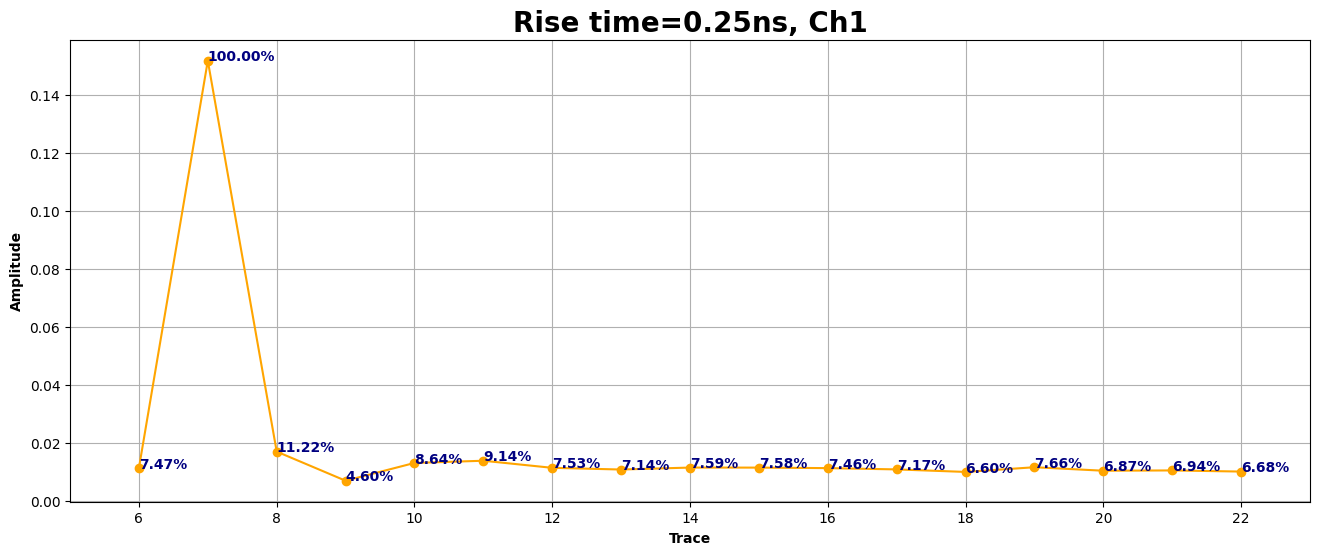

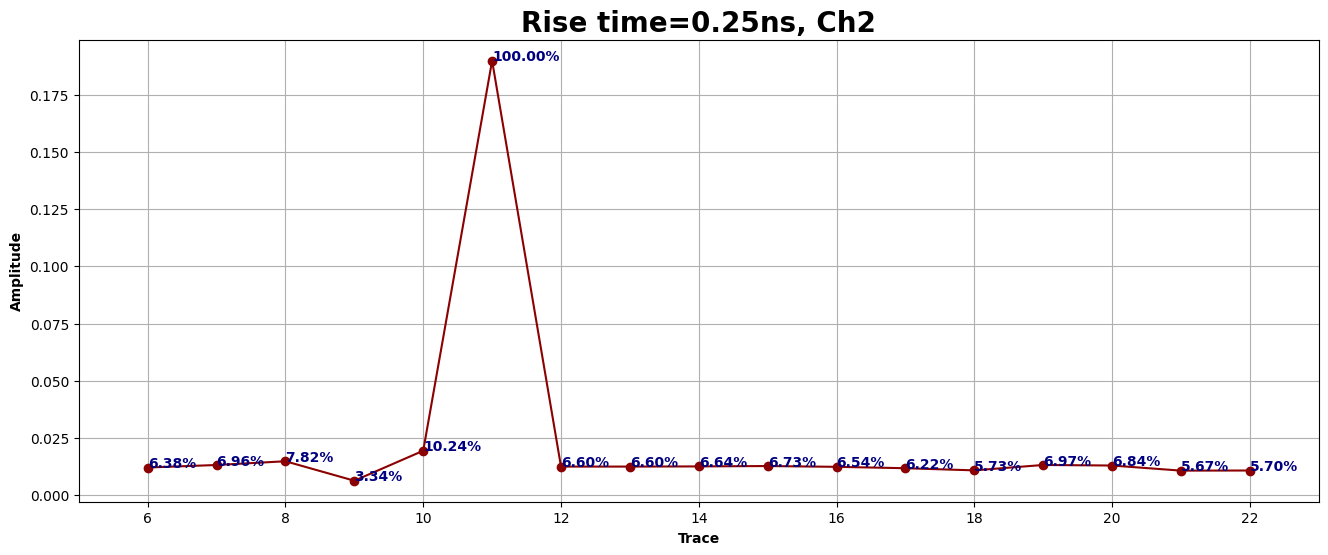

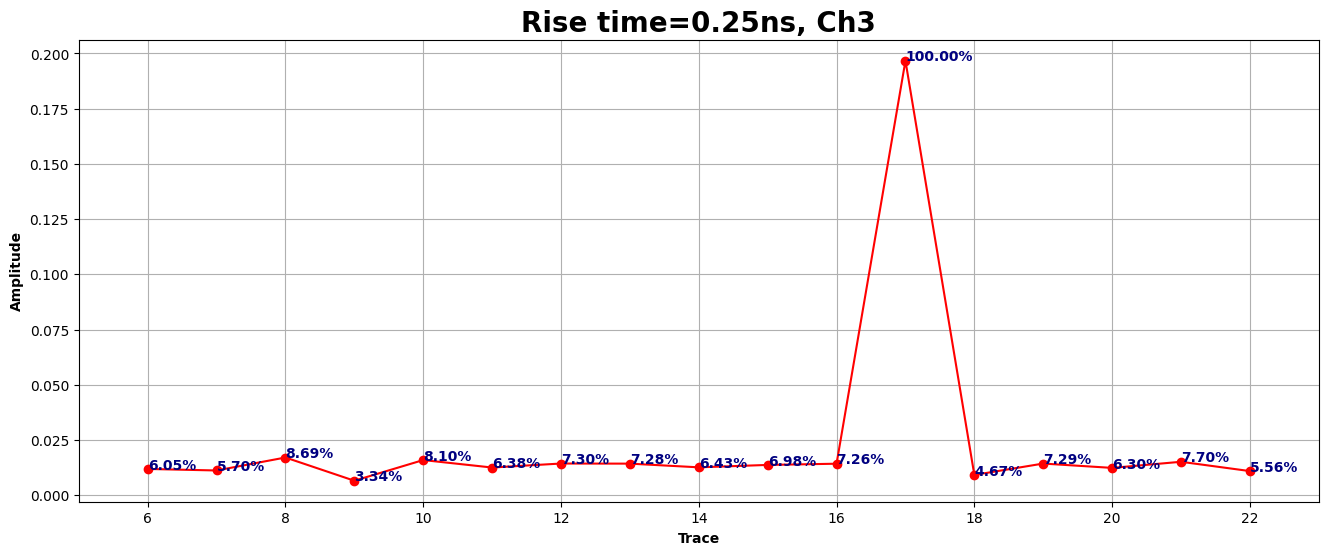

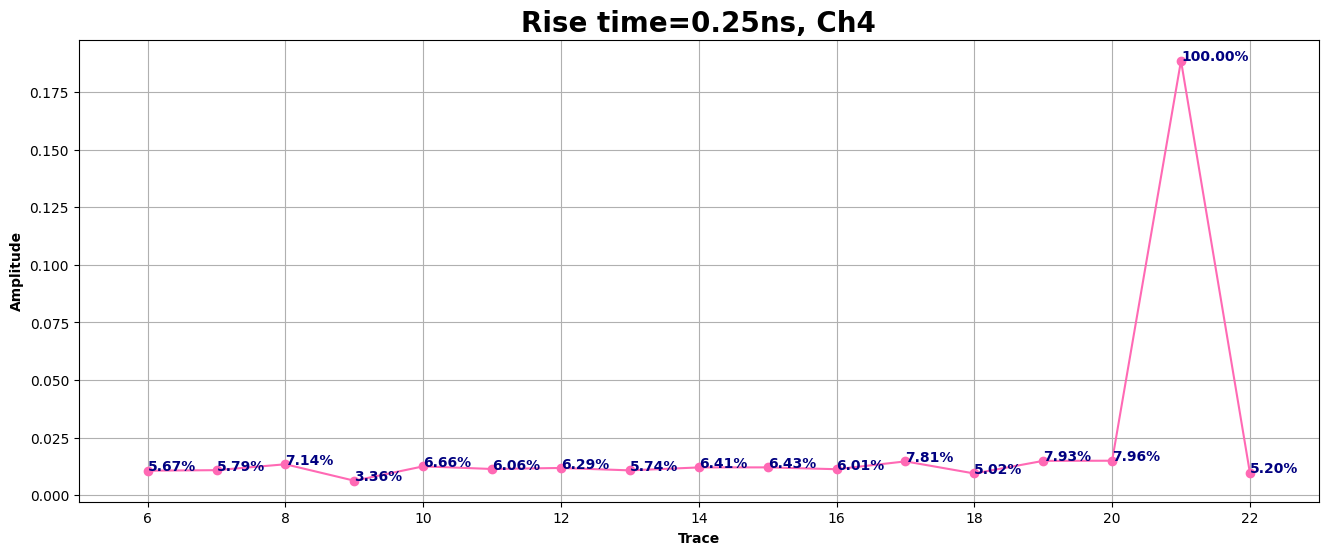

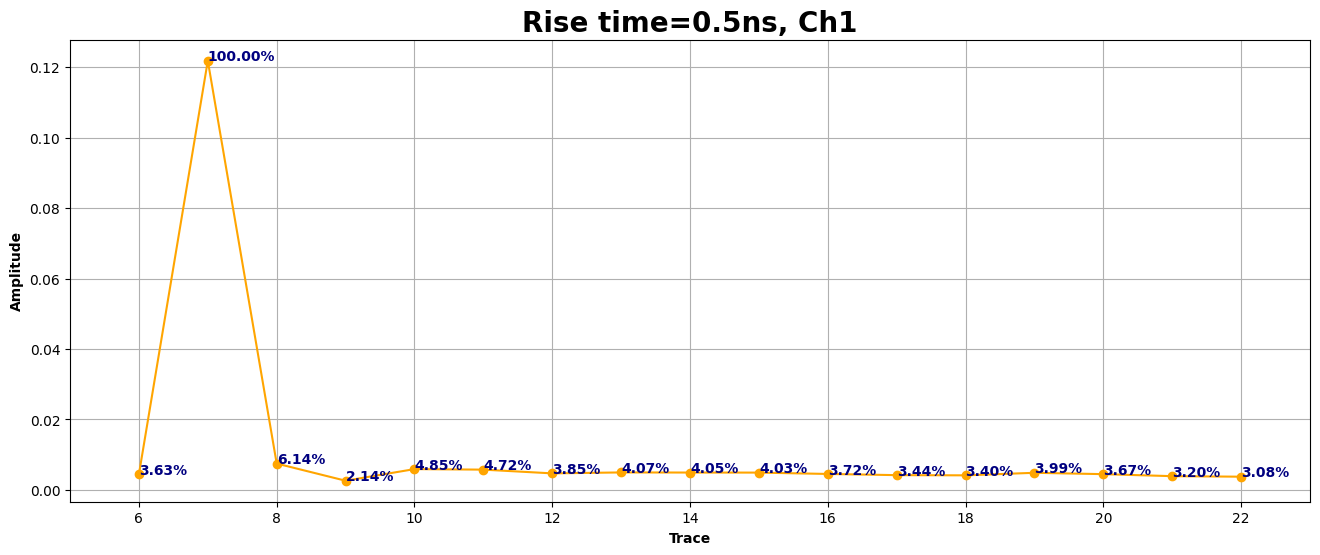

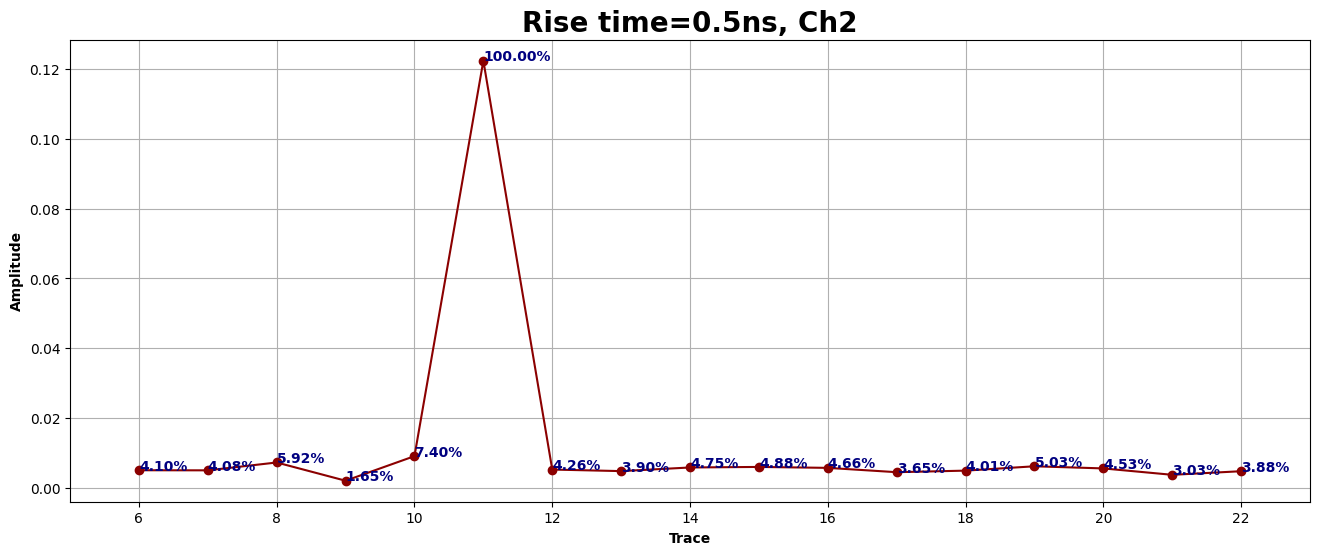

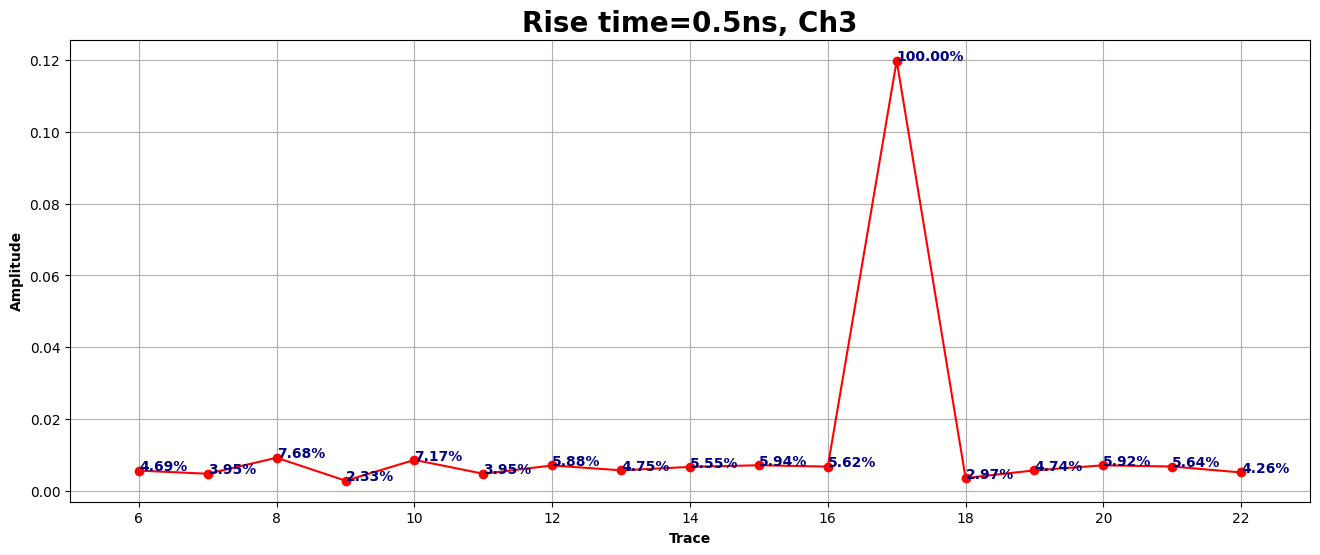

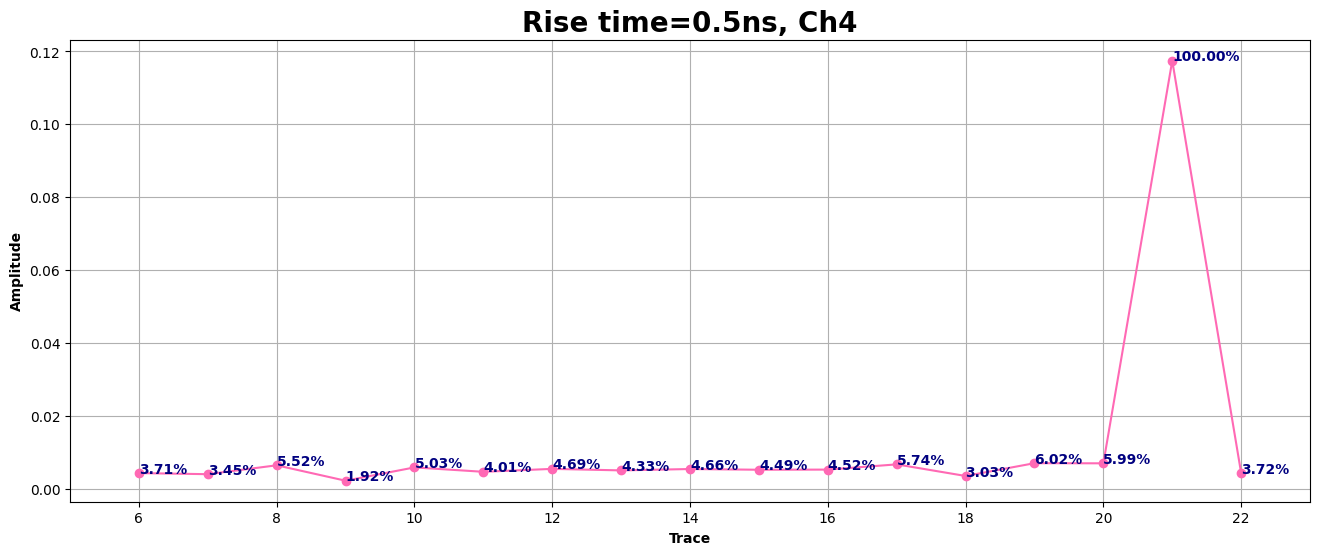

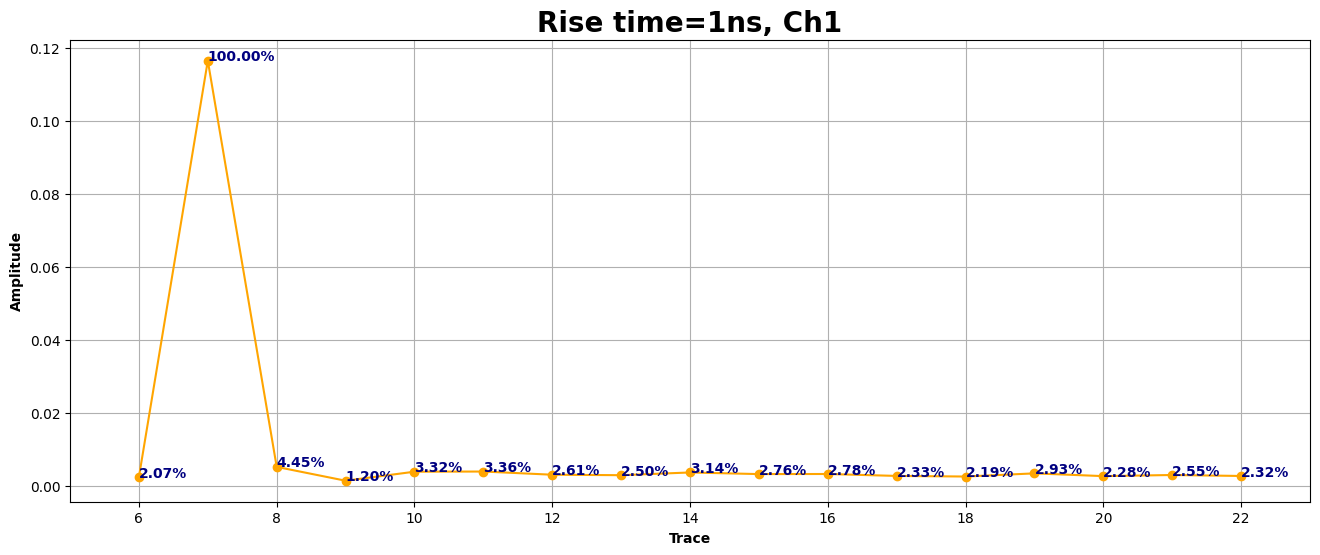

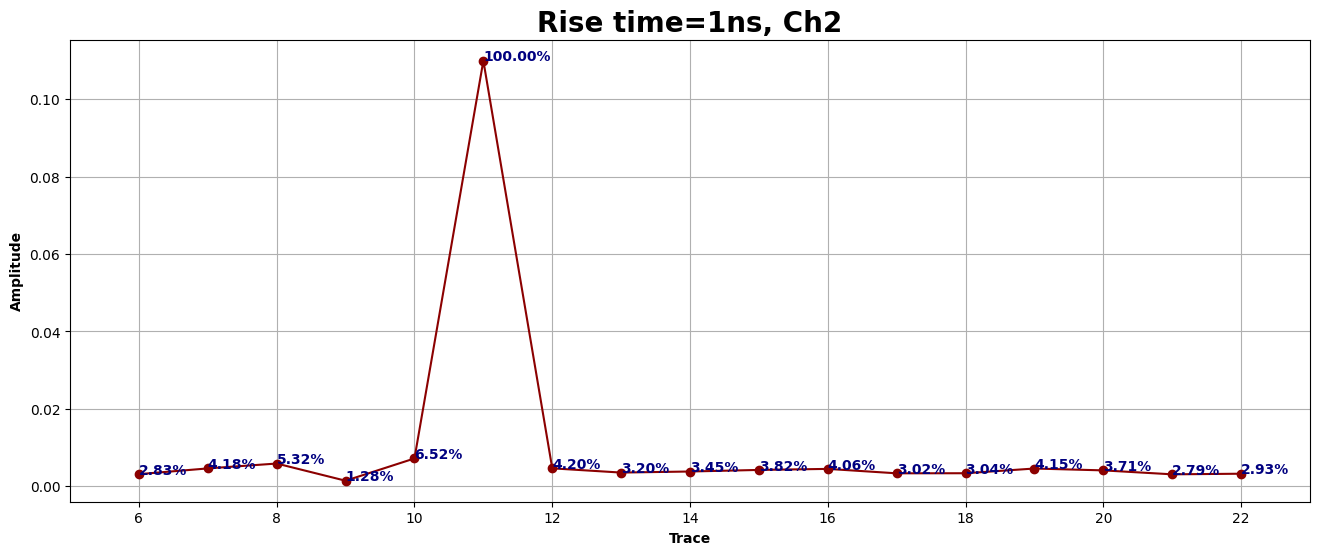

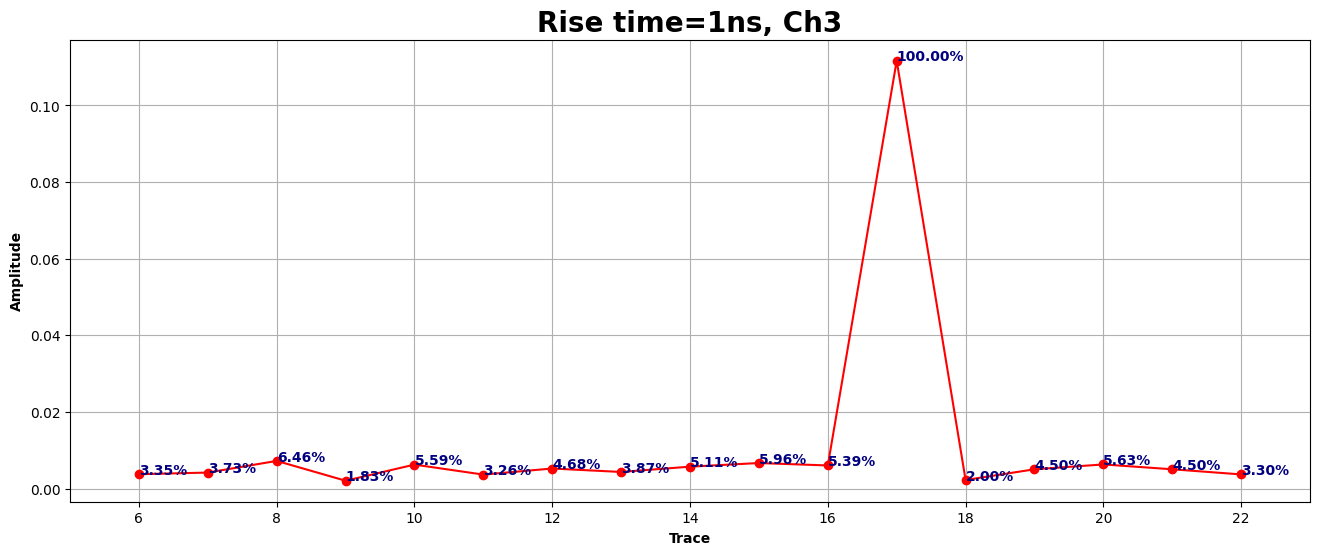

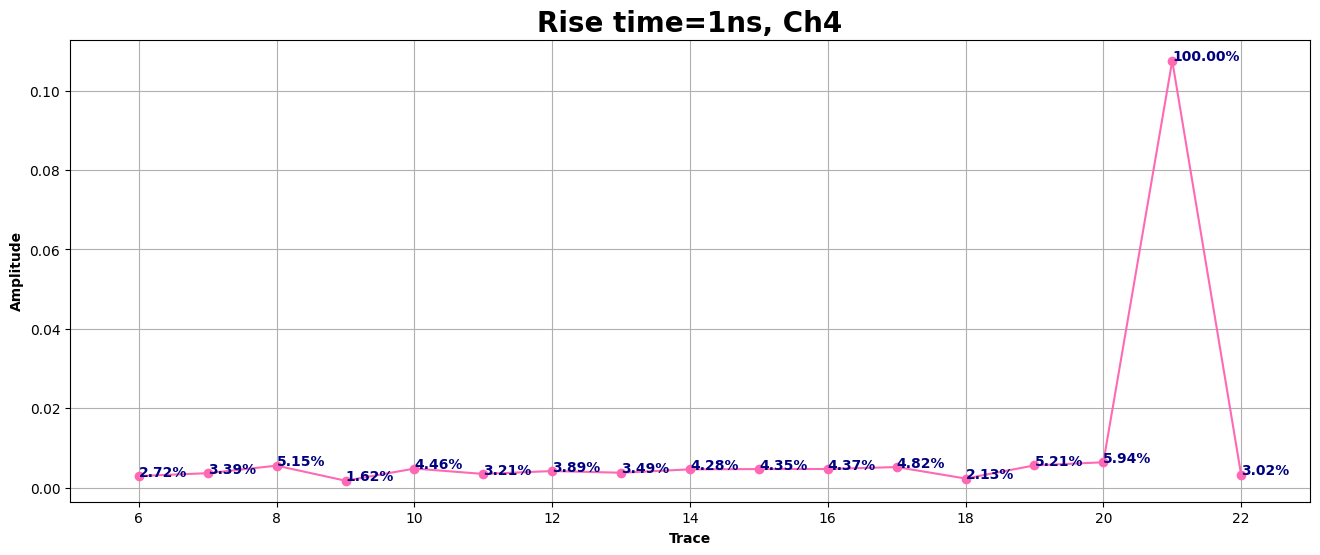

In [ ]:
position = position_plots(list_a,6,22,l=[.25,.5,1],ch_num=4,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.11.17.21/RT.0.25.0.5.1 Plots")

In [ ]:
def position_overlap(amp,trace_min,trace_max,l,ch_num,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/"):
  trace_x = list(range(trace_min,trace_max+1));

  position = [];

  for rt in range(0,len(l)):
    position.append([]);
    for ch in range(ch_num):
      position[rt].append([]);

  for rt in range(0,len(l)):
    for ch in range(ch_num):
      for tr in range(0,trace_max-trace_min+1):
        position[rt][ch].append(max(abs(amp[rt][tr][ch])));

  sec_max_list = []
  max_value = 0

  for ch in range(ch_num):
    for rt in range(len(l)):

      max_a = max(position[rt][ch])
      max_amp = max_a/max_a

      crosstalk = []
      second_max = []

      for amp in position[rt][ch]:
        crosstalk.append((1-(max_a-amp)/max_a)*100)
        second_max.append((1-(max_a-amp)/max_a)*100)

      if max_value < max(second_max):
        max_value = max(second_max)
        second_max.remove(max_value)
        second_highest = max(second_max)
        sec_max_list.append(second_highest)
    max_value=0

  for ch in range(ch_num):
    plt.figure(figsize=(16,8));
    for rt in range(len(l)):
      #finding % cross talk
      max_a = max(position[rt][ch])
      max_amp = max_a/max_a

      crosstalk = []
      for amp in position[rt][ch]:
        crosstalk.append((1-(max_a-amp)/max_a)*100)

      #plot
      plt.title(f"Rise time= .25, .5, 1ns, Ch{ch+1}",fontweight="heavy", fontsize=20);
      plt.ylabel("Amplitude", fontweight="heavy", fontsize=10)
      plt.xlabel("Trace", fontweight="heavy", fontsize=10)
      plt.ylim(0,sec_max_list[ch]*1.1)
      plt.xlim(trace_min-1,trace_max+1)
      plt.xticks(trace_x)
      locator = MultipleLocator(1)  # Set tick locator to increment by 5%
      formatter = FuncFormatter(lambda x, _: f'{int(x)}%')  # Format tick labels as percentages

      #Customize y-axis ticks
      plt.gca().yaxis.set_major_locator(locator)
      plt.gca().yaxis.set_major_formatter(formatter)

      #plt.gca().yaxis.set_major_formatter(PercentFormatter())
      plt.grid(True)
      if l[rt] == .25:
        c = "darkred"
      elif l[rt] == .5:
        c = "red"
      else:
        c = "orange"
      plt.plot(trace_x,crosstalk,color=c,marker="o", label=f"Rise time = {l[rt]}");
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

      for i in range(len(trace_x)):
        plt.annotate(f'{crosstalk[i]:.2f}%', (trace_x[i], crosstalk[i]), fontsize=10, fontweight="heavy", color="navy")

      plt.savefig(f'{directory}/position-abs-scale-ch{ch+1}.png')

    plt.show();
    print("\n")

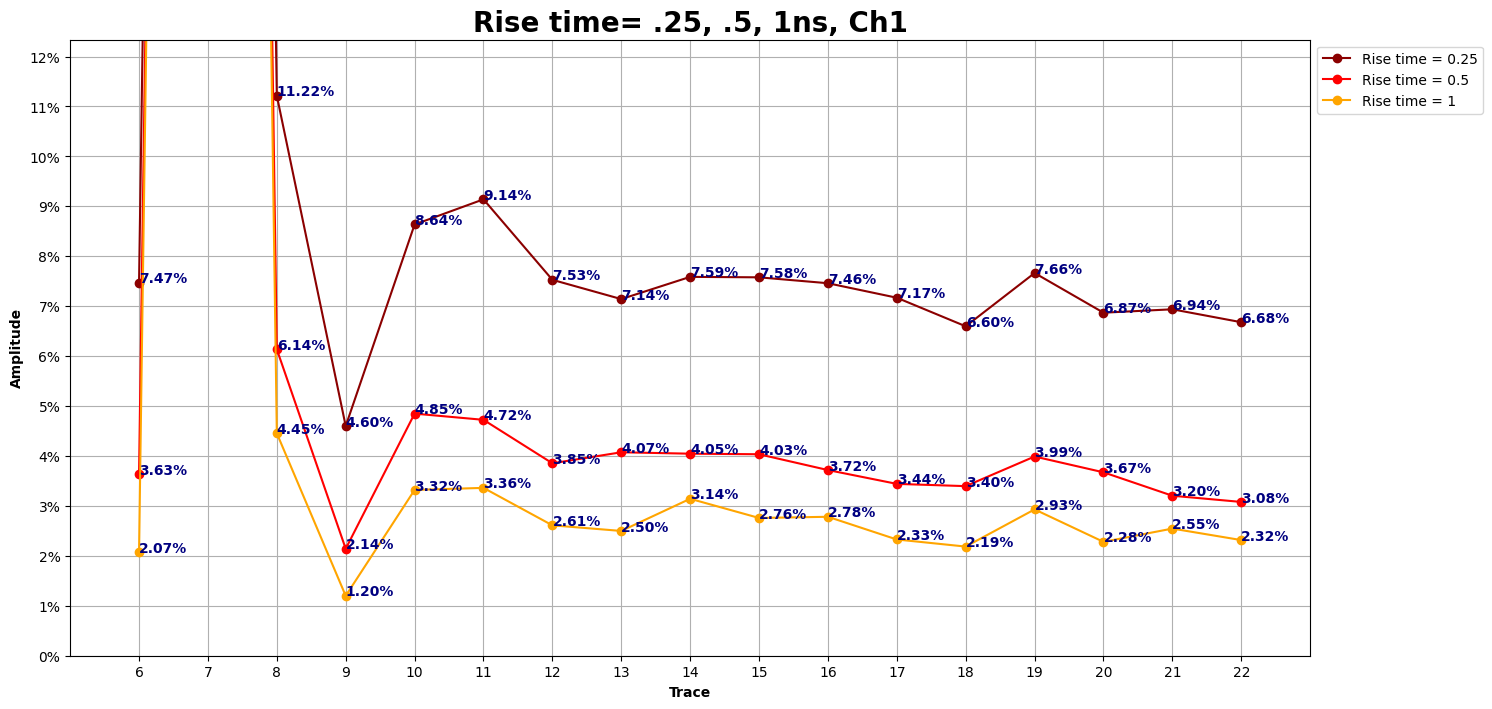

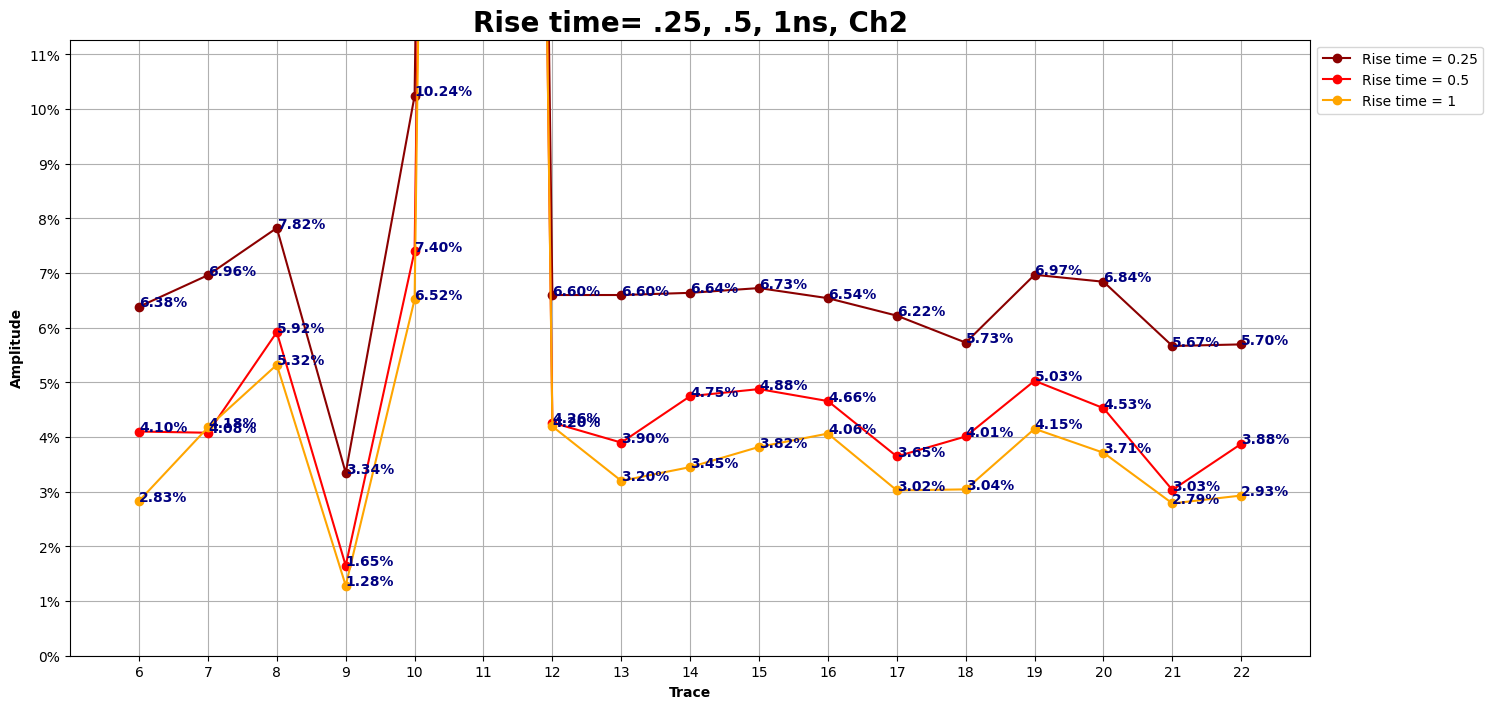

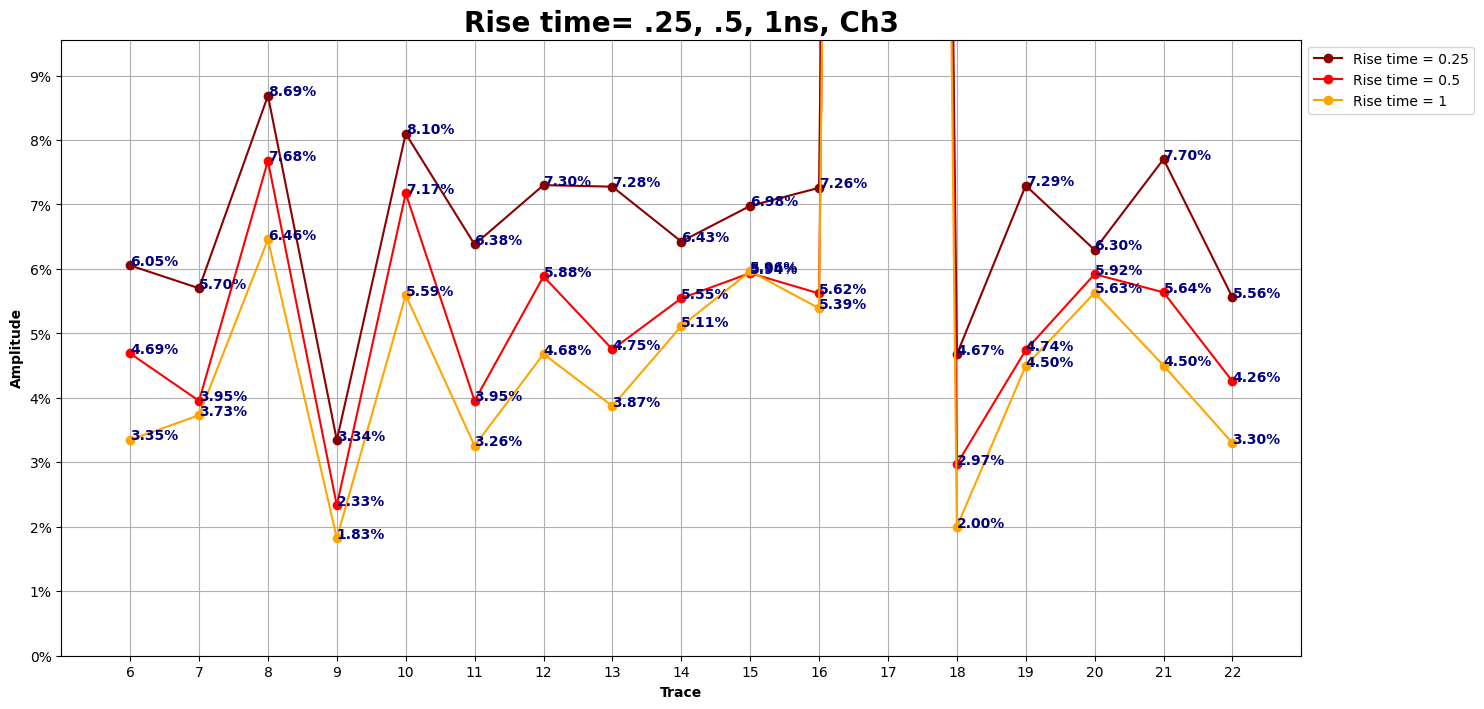

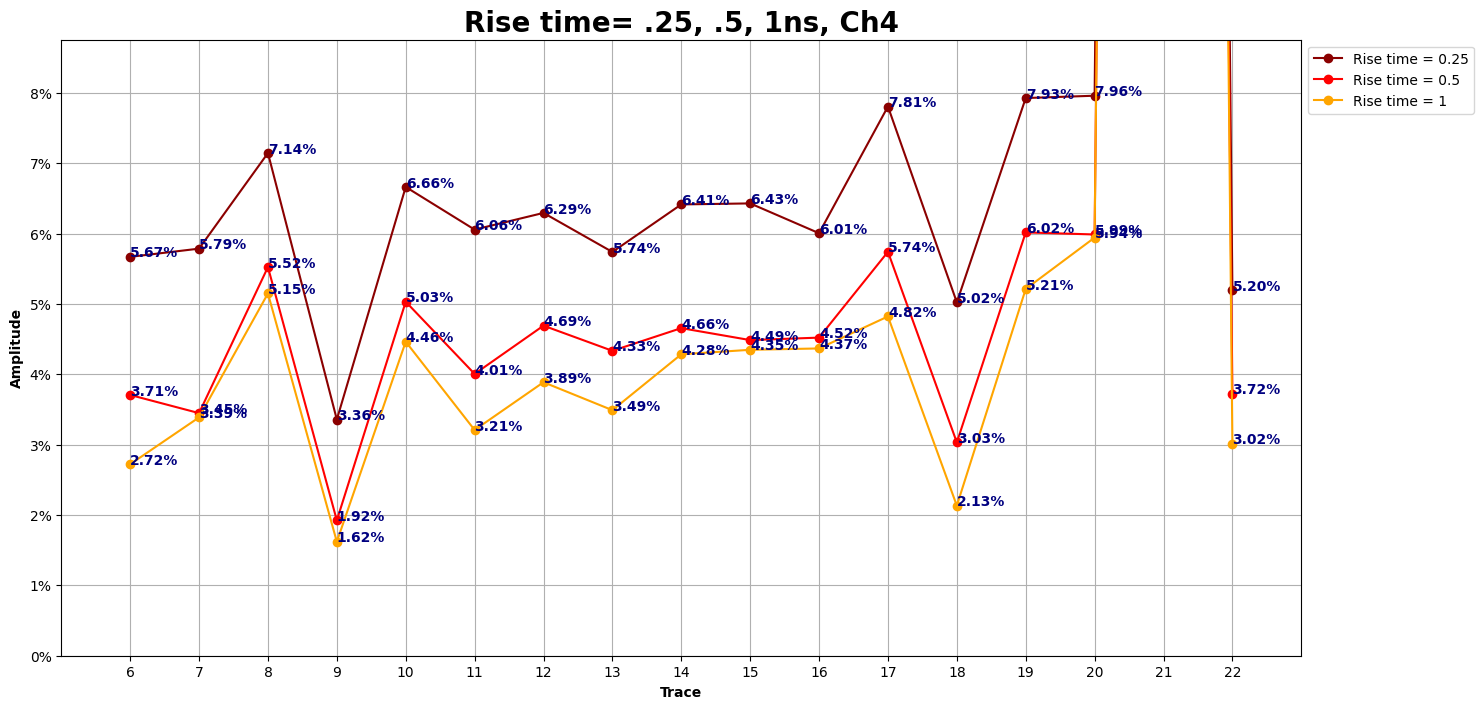

In [ ]:
position_overlap(list_a,6,22,[.25,.5,1],4,saveplots=True,directory="/content/drive/MyDrive/Research/SCIPP/PIONEER Sensors/7.11.17.21/RT.0.25.0.5.1 Plots")